In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'Heart_disease_cleveland_new.csv'

In [13]:
print(df.shape)        # Rows and columns
print(df.info())       # Types of each column and non-null counts
print(df.describe())   # Statistical summary of numerical columns


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    2.158416 

In [14]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


target
0    164
1    139
Name: count, dtype: int64


<Axes: xlabel='target'>

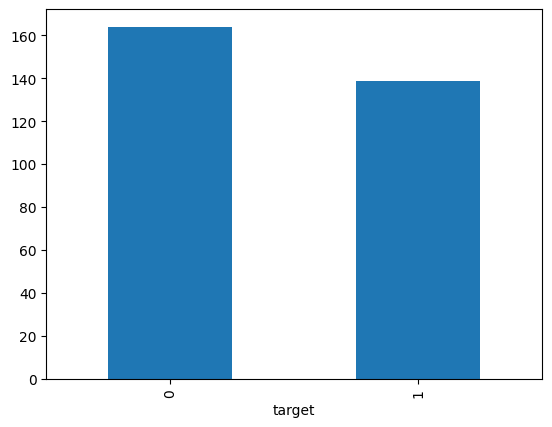

In [15]:
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='bar')

In [16]:
print(df.duplicated().sum())

# If needed
# df = df.drop_duplicates()


0


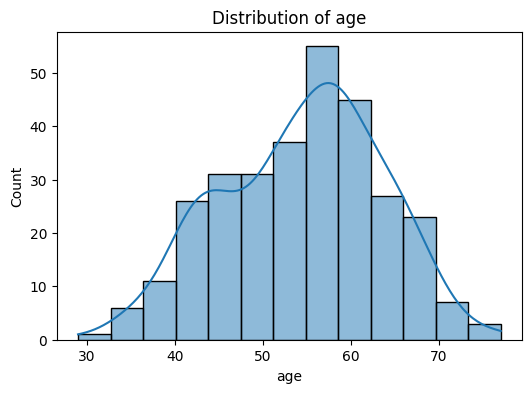

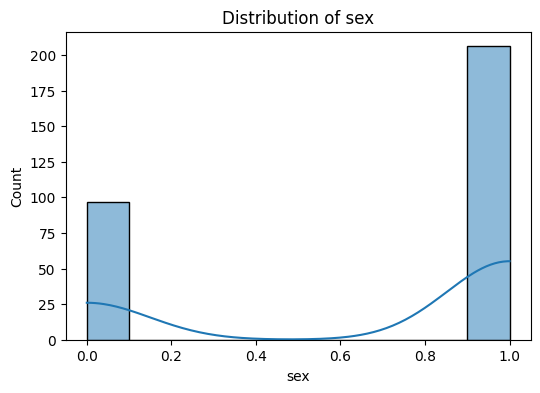

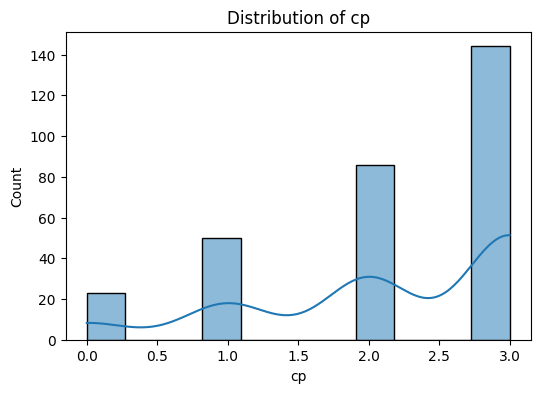

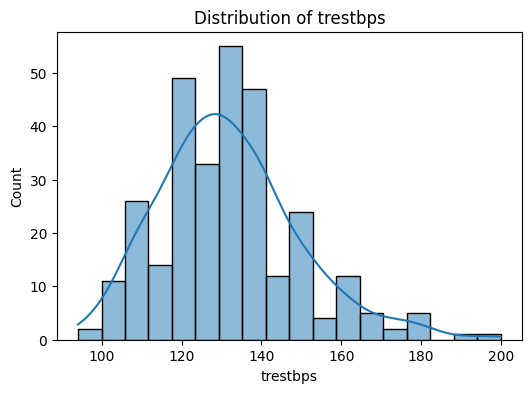

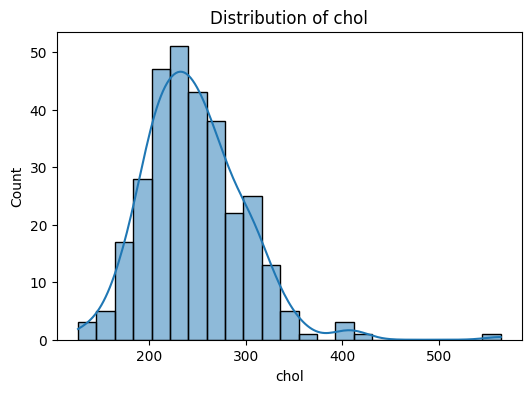

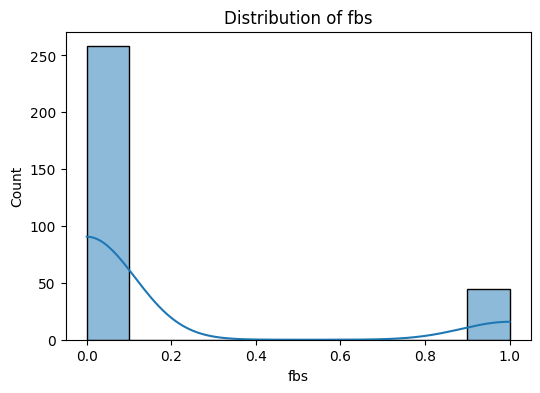

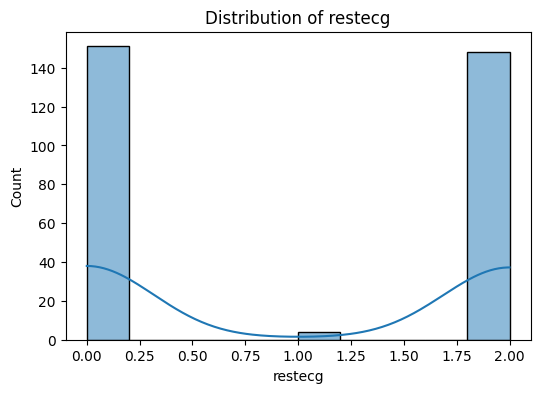

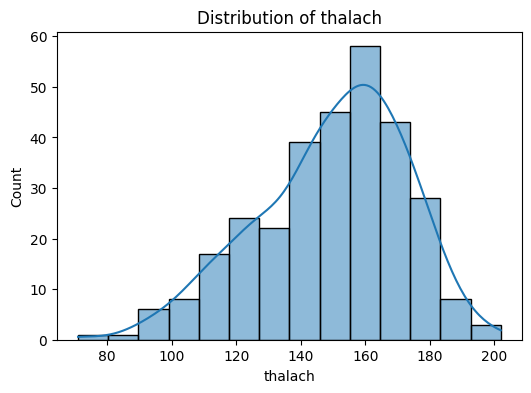

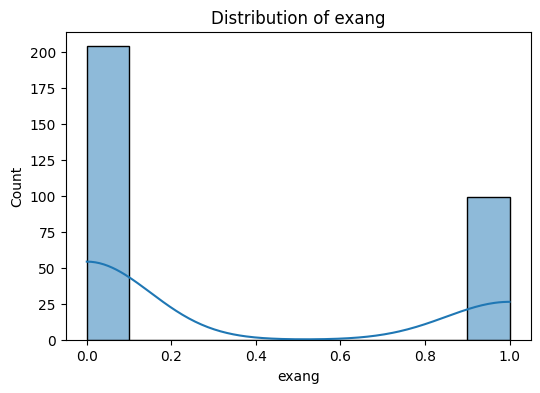

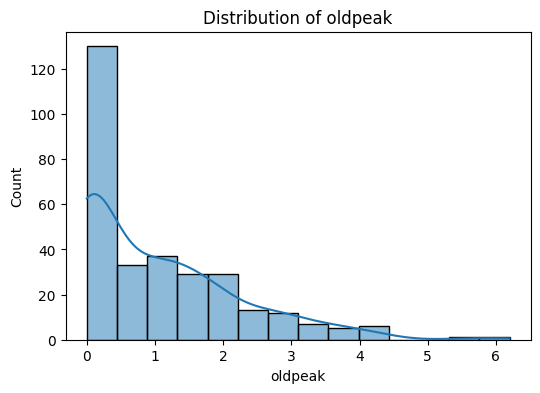

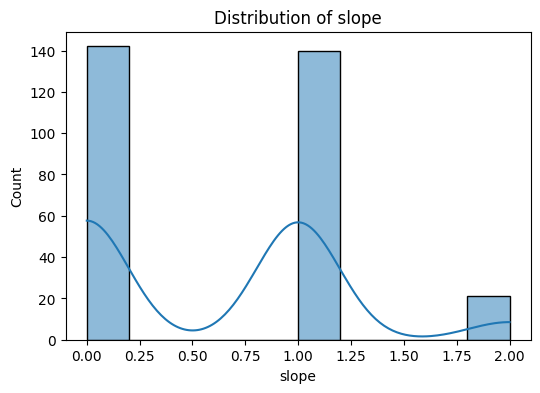

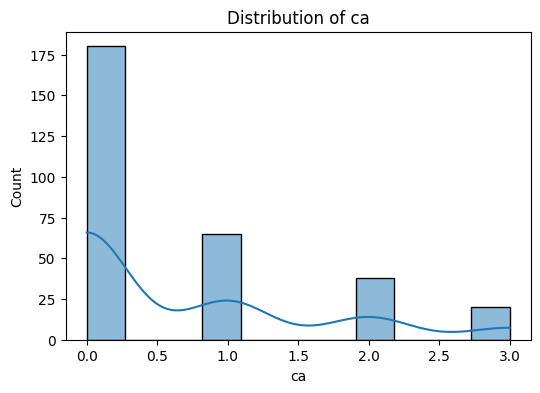

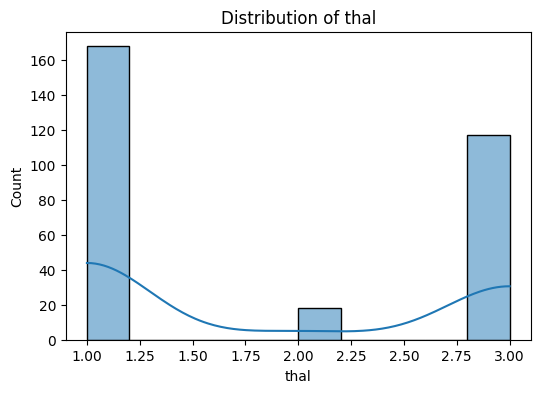

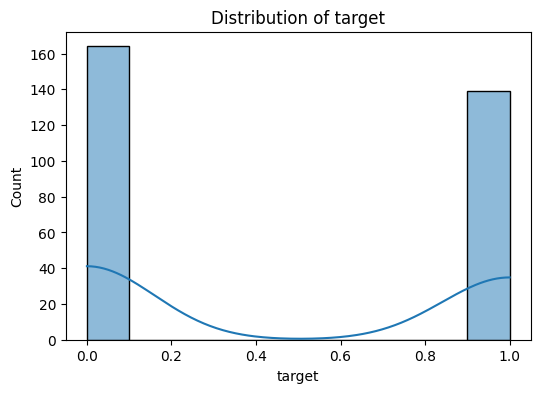

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


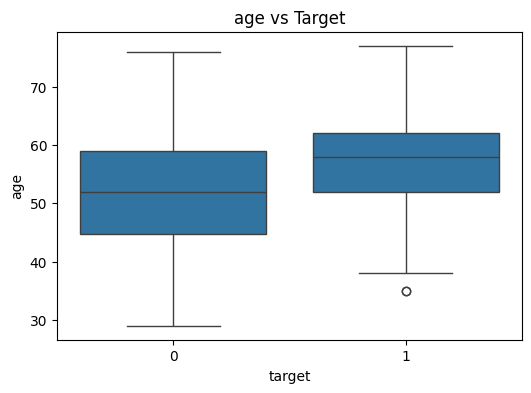

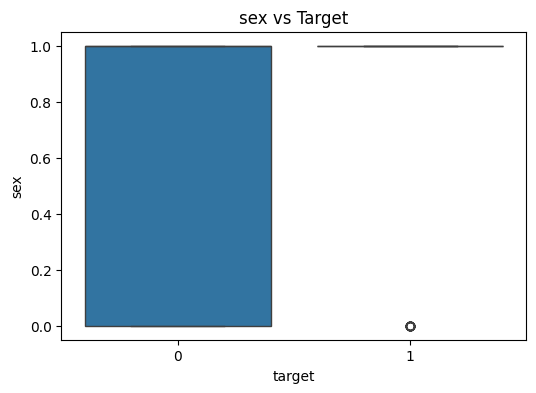

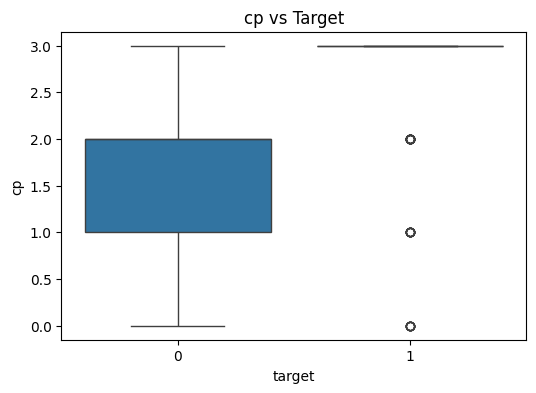

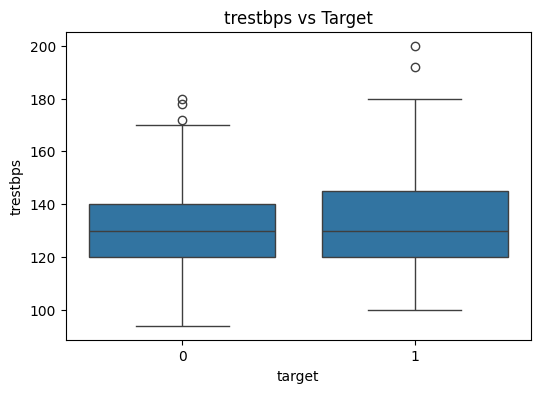

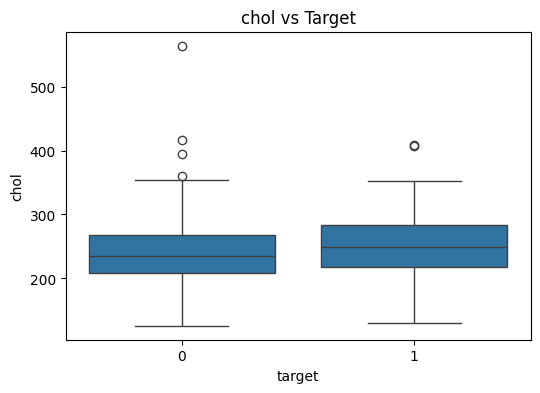

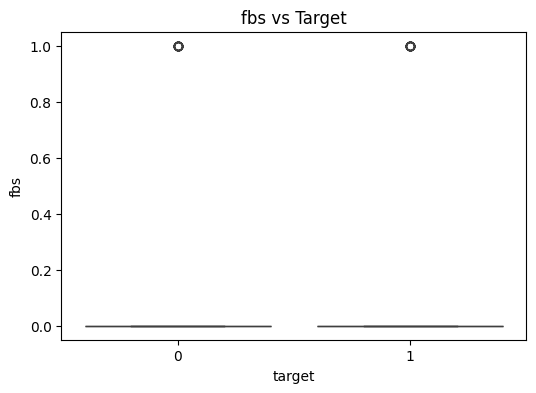

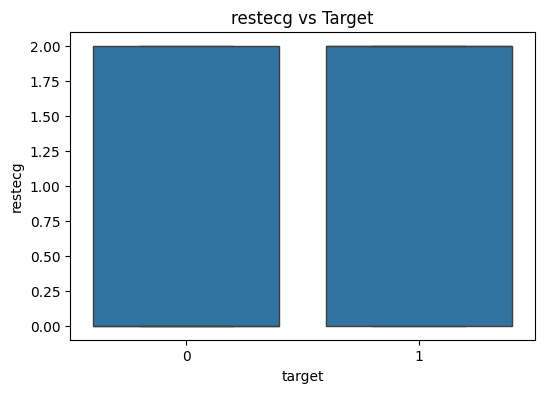

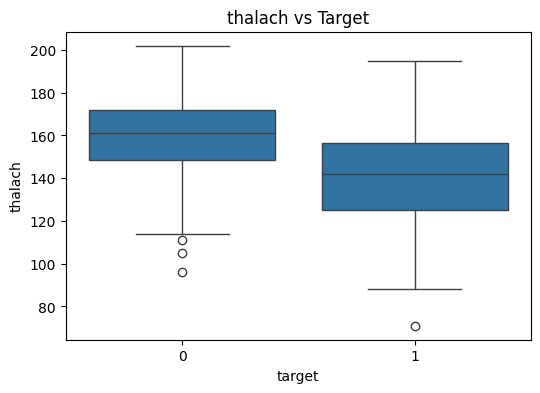

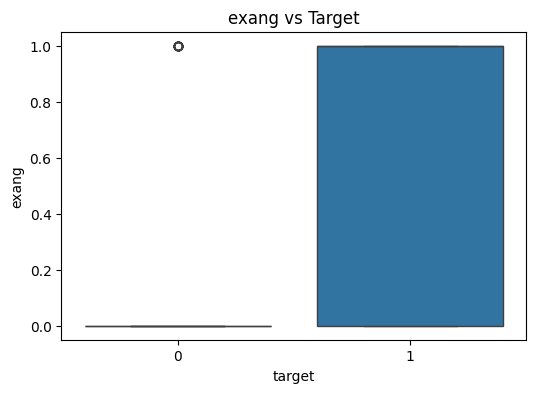

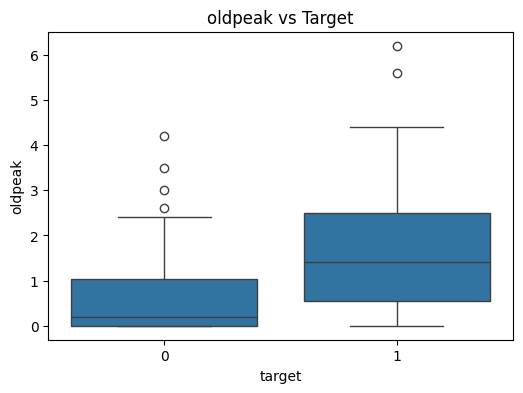

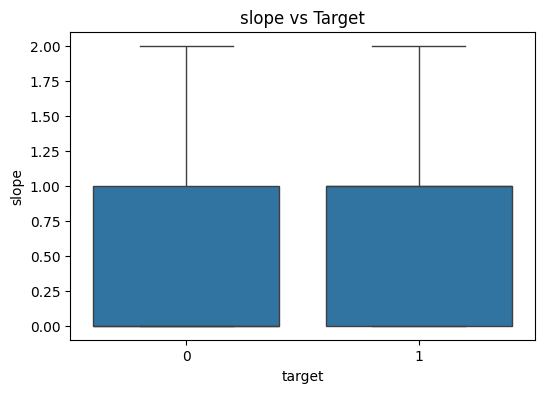

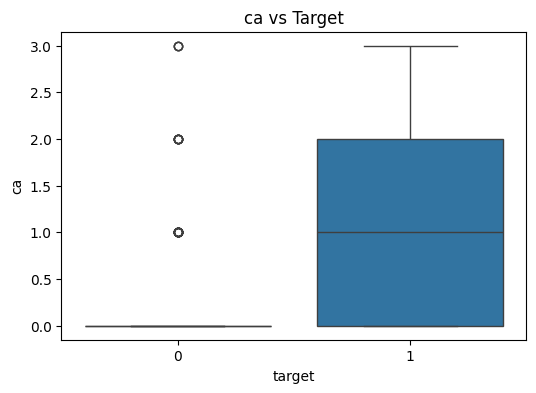

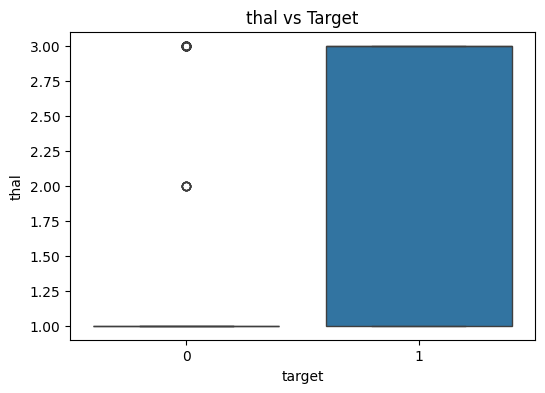

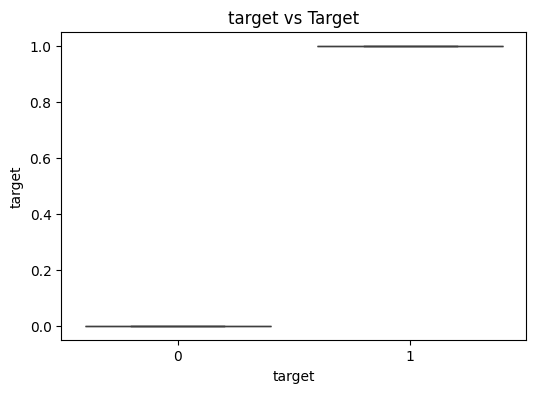

In [19]:
# Numerical vs Target
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
    plt.show()


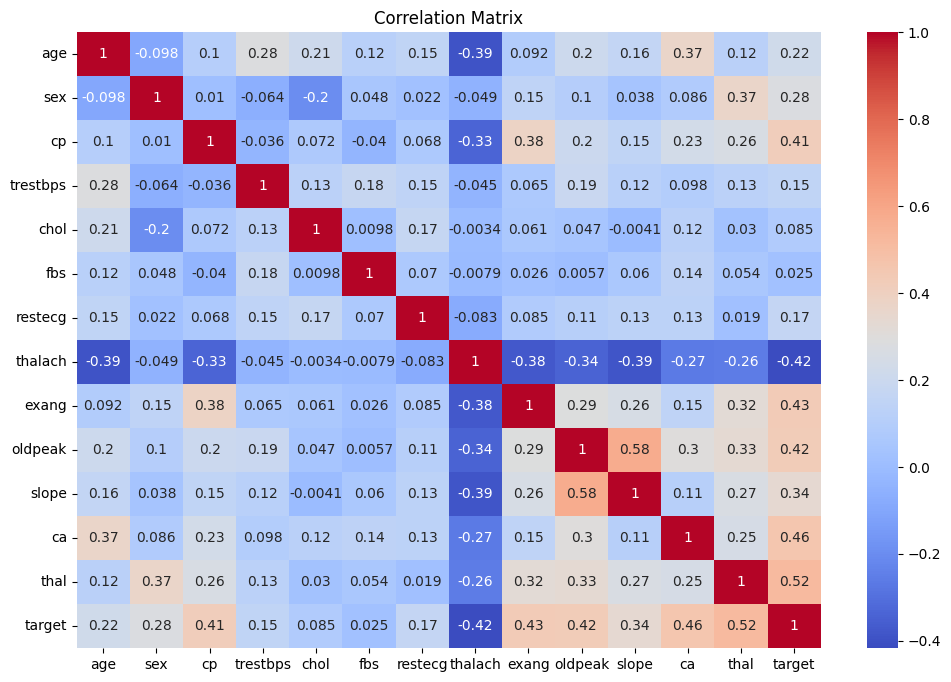

In [20]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Correlation with target	Interpretation
thal	0.52	Strong positive correlation — "thal" is important for predicting heart disease.
ca	0.46	Strong positive correlation — "ca" (number of major vessels colored by fluoroscopy) is important too.
cp	0.41	Chest pain type correlates well with the target. More chest pain → more likely heart disease.
exang	0.43	Exercise-induced angina is important — if exang=1 (yes), higher heart disease probability.
oldpeak	0.42	Depression induced by exercise relates strongly to heart disease.
thalach	-0.42	Max heart rate achieved is negatively correlated — lower max heart rate → higher heart disease risk.
slope	0.34	The slope of the peak exercise ST segment also moderately correlates.


Features like thal, ca, cp, exang, oldpeak, thalach are most important.

Features like age, sex, trestbps, chol, fbs, restecg have lower correlation with the target individually.

In [23]:
# Genetic Algorithm (GA) for feature selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from genetic_selection import GeneticSelectionCV

# Assume df is your DataFrame
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator = RandomForestClassifier()

selector = GeneticSelectionCV(
    estimator,
    cv=5,
    verbose=1,
    scoring="accuracy",
    max_features=8,  # max number of features to select
    n_population=50,
    crossover_proba=0.5,
    mutation_proba=0.2,
    n_generations=40,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.05,
    tournament_size=3,
    n_gen_no_change=10,
    caching=True,
    n_jobs=-1
)

selector = selector.fit(X_train, y_train)

# Selected features
selected_features_ga = X_train.columns[selector.support_]
print("Selected features by Genetic Algorithm:")
print(selected_features_ga)


Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	50    	[ 0.679677  4.3       0.046668]	[ 0.075212  2.247221  0.016449]	[ 0.496173  1.        0.014164]	[ 0.822194  8.        0.089801]
1  	32    	[-599.312502    5.76      600.041975]	[ 2375.042111     2.112439  2374.857813]	[-10000.            1.            0.006781]	[     0.822194     10.        10000.      ]
2  	31    	[-599.280765    6.68      600.043427]	[ 2375.050129     1.462053  2374.857446]	[-10000.            2.            0.006781]	[     0.822194      9.        10000.      ]
3  	28    	[-799.272327    6.9       800.043718]	[ 2713.146573     1.153256  2712.919102]	[-10000.            4.            0.027005]	[     0.822194      9.        10000.      ]
4  	30    	[-599.255731    7.02      600.046723]	[ 2375.056454     1.348925  2374.856613]	[-10000.            3.            0.026906]	[     0.826

 ### the Genetic Algorithm selected this feature set:

text
Copy
Edit
Selected features by Genetic Algorithm:
['age', 'sex', 'cp', 'chol', 'exang', 'slope', 'ca', 'thal']